# Lab Experience 4
# Face Detection and Recognition
### Digital Forensics

**Face detection** is the task of localizing a face in an image or video sequence. It can be done using computer vision algorithms like "Viola and Jones" or Deep Learining techniques.

**Face recognition** is the task of classifying a face whenever it has been localized, i.e., telling who is in that face.

The workflow used in this lab experience to prepare the dataset used to train the neural network is structured as follows:
1. The Viola and Jones algorithm is used to detect the face in the image in order to isolate it
2. The faces are preprocessed and augmented in order to be able to train a more robust netowork
3. The colorspace is converted to Grayscale.
4. The dataset is ready to be used.

The original dataset has been **preprocessed** and the images have been divided into training and test set and stored in the numpy files `X_train` and `X_test`. The training set has been augmented by a factor 10.
The correspondent labels are stored in the files `Y_train` and `Y_test`. 

The following table reports the association between labels and people in the dataset.

| Label | Description |
| --- | --- |
| 0 | Adam Sandler |
| 1 | Alyssa Milano |
| 2 | Bruce Willis |
| 3 | Denise Richards |
| 4 | George Clooney |
| 5 | Gwyneth Paltrow |
| 6 | Hugh Jackman |
| 7 | Jason Statham |
| 8 | Jennifer Love Hewitt |
| 9 | Lyndsay Lohan |
| 10 | Mark Ruffalo |
| 11 | Robert Downey Jr |
| 12 | Will Smith |

In [1]:
#load the required packages and check Scikit-learn version
%matplotlib inline  

import tensorflow as tf
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from tensorflow import keras
import math
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import pandas as pd
import seaborn as sn



In [2]:
!gdown https://drive.google.com/uc?id=1UH1v_G0cCQwcp8Vb6cW2OHRZxb3AUnF-

Access denied with the following error:

 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1UH1v_G0cCQwcp8Vb6cW2OHRZxb3AUnF- 



In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
replace datasets/Y_test_sunglasses.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/Y_test_sunglasses.npy  
replace datasets/Y_test_glasses.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/Y_test_glasses.npy  
replace datasets/Y_test_mask.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/Y_test_mask.npy  
replace datasets/Y_test.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/Y_test.npy     
replace datasets/Y_test_facemask.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/Y_test_facemask.npy  
replace datasets/Y_train.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/Y_train.npy    
replace datasets/X_test_facemask.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/X_test_facemask.npy  
replace datasets/X_test_mask.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/X_test_mask.npy  
replace datasets/X_test_glasses.npy? [y]es, [

In [ ]:
X_train_path = './datasets/X_train.npy'
X_test_path = './datasets/X_test.npy'
Y_train_path = './datasets/Y_train.npy'
Y_test_path = './datasets/Y_test.npy'



In [ ]:
X_train = np.load(X_train_path)
X_test = np.load(X_test_path)
Y_train = np.load(Y_train_path)
Y_test = np.load(Y_test_path)



X_test_facemask = np.load('./datasets/X_test_facemask.npy')
Y_test_facemask = np.load('./datasets/Y_test_facemask.npy')

# # X_test_glasses = np.load(X_test_glasses)
# X_test_mask = np.load(X_test_mask)
# X_test_facemask = np.load(X_test_facemask)


# Y_test_facemask = np.load(Y_test_facemask)
# # Y_test_glasses = np.load(Y_test_glasses)
# Y_test_mask = np.load(Y_test_mask)
# Y_test_facemask = np.load(Y_test_facemask)
# # print(Y_train)


In [ ]:
def plot_images(images, labels, predictions=None, class_names=None):
    assert len(images) == len(labels) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        
        # Plot image.
        ax.imshow(images[i].squeeze(), cmap='gray')
        
        # Show true and predicted classes.
        if predictions is None:
            xlabel = "True: {0}".format(class_names[int(labels[i])])
        else:
            xlabel = "True: {0}, Pred: {1}".format(class_names[int(labels[i,0])], class_names[int(predictions[i].argmax())])
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [ ]:
#define the classes
label_ids = {'Adam Sandler': 0, 'Alyssa Milano': 1, 'Bruce Willis': 2, 'Denise Richards': 3, 'George Clooney': 4, 'Gwyneth Paltrow': 5, 'Hugh Jackman': 6, 'Jason Statham': 7, 'Jennifer Love Hewitt': 8, 'Lindsay Lohan': 9, 'Mark Ruffalo': 10, 'Robert Downey Jr': 11, 'Will Smith': 12}

# Number of classes
num_classes = 13




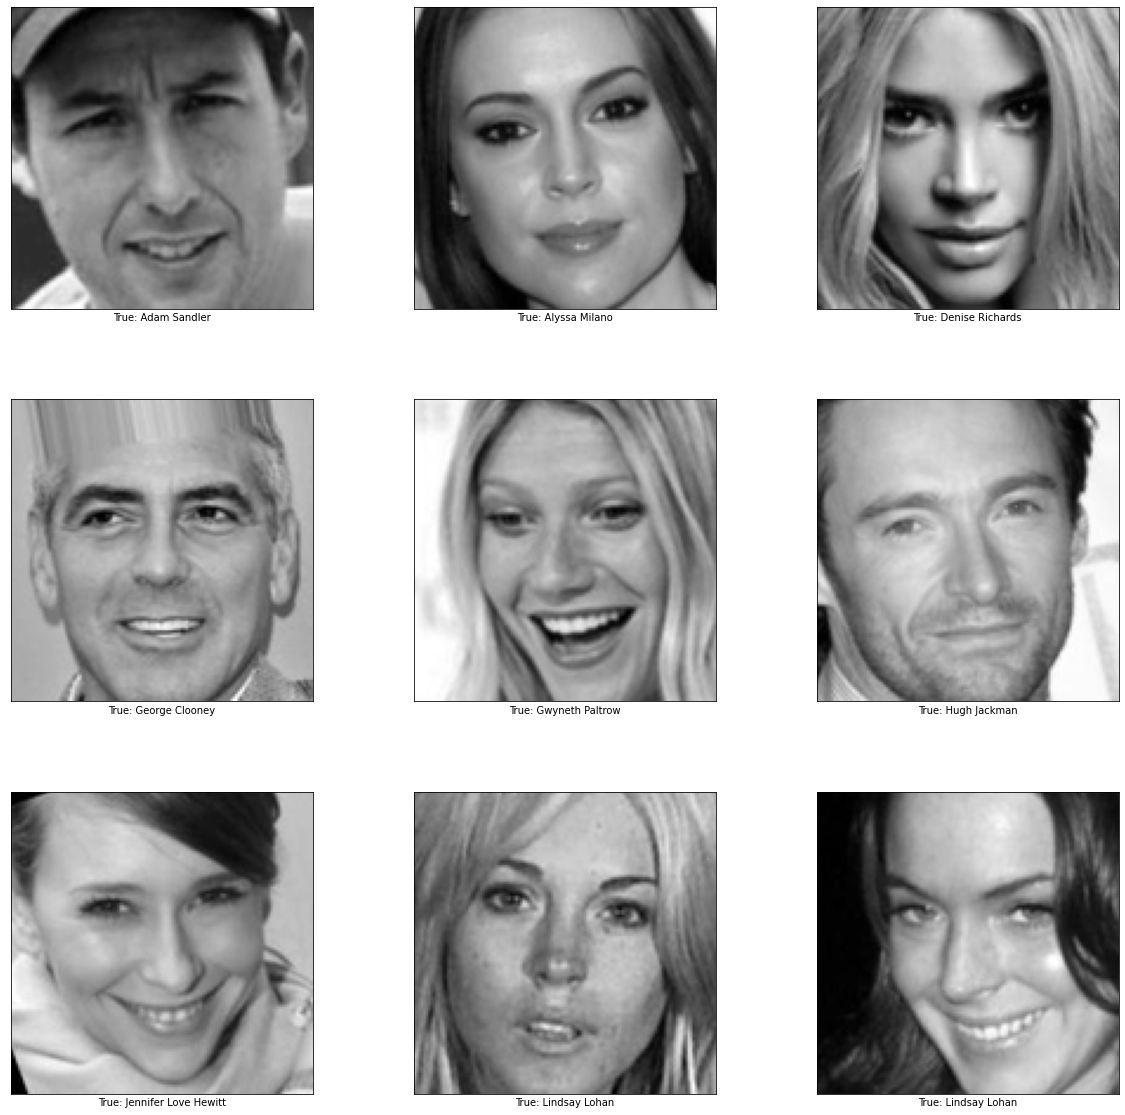

In [ ]:
class_names = {value:key for key, value in label_ids.items()}
plot_images(
    X_train[[1, 3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000]],
    Y_train[[1, 3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000]],
    predictions=None,
    class_names=class_names
)

# TODO 1

Before feeding the neural network, the images must be normalized (with values between 0 and 1) and shuffled, together with their labels. Shuffle the images storing the results in the variables `train_labels` and `train_images`. Then normalize the images.

In [ ]:
################# code here ###################
#shuffle sets using the shuffle function from sklearn (provided above)


def shuff(X_train,Y_train):
  train_images, train_labels = shuffle(X_train, Y_train, random_state=0)

# Normalization
  train_images = train_images/255.0
  return train_images, train_labels

shuff(X_train,Y_train)


# print(train_labels.shape)
# train_label=np.reshape(len(train_labels), 1)
# ################# code here ###################


# from numpy import asarray
# from sklearn.preprocessing import OneHotEncoder
# # define data
# # data = asarray(train_labels)
# # print(data)
# # define one hot encoding
# encoder = OneHotEncoder(sparse=False)
# # transform data
# train_labels = encoder.fit_transform(train_labels)
# print(train_labels.shape)

(array([[[[0.31372549],
          [0.30980392],
          [0.29803922],
          ...,
          [0.50980392],
          [0.44313725],
          [0.38039216]],
 
         [[0.30980392],
          [0.30196078],
          [0.28235294],
          ...,
          [0.49411765],
          [0.44705882],
          [0.4       ]],
 
         [[0.30980392],
          [0.29411765],
          [0.2627451 ],
          ...,
          [0.44705882],
          [0.43921569],
          [0.41568627]],
 
         ...,
 
         [[0.1372549 ],
          [0.10196078],
          [0.0627451 ],
          ...,
          [0.08235294],
          [0.10980392],
          [0.12941176]],
 
         [[0.10980392],
          [0.07843137],
          [0.04705882],
          ...,
          [0.06666667],
          [0.08627451],
          [0.10588235]],
 
         [[0.08627451],
          [0.05882353],
          [0.03137255],
          ...,
          [0.05098039],
          [0.07058824],
          [0.09019608]]],
 
 
        [

# TODO 2
Define a simple Convolutional neural network that learn to classify the faces of the various celebrities in the dataset.

Make sure that the network you has good performance (at least 90% validation accuracy) and that it is not overfitting (i.e. training accuracy close to validation accuracy).

In [ ]:
################# code here ###################
# Number of samples and size of one of the image dimension (images are squared)
num_samples = len(train_images)
img_shape = train_images.shape
################# code here ###################
print(num_samples,img_shape, sep='\n')

29481
(29481, 128, 128, 1)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dropout, Flatten, Dense, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras import layers


import matplotlib.pyplot as plt

In [ ]:

################# code here ###################

# model = Sequential([
#     Conv2D(8, 7, strides=3, input_shape = img_shape[1:]),
#     LeakyReLU(),
#     Conv2D(16, 5, strides=2),
#     LeakyReLU(),
#     Conv2D(16, 3, strides=2),
#     LeakyReLU(),
#     Conv2D(16, 3, strides=2),
#     LeakyReLU(),
#     Dropout(0.25),
#     Flatten(),
#     Dense(13, activation = "softmax"),
# ])
################# code here ###################

In [ ]:
model2 = keras.Sequential(
    [
        keras.Input(shape=(128, 128, 1)),
        Conv2D(8, 7, strides=3, input_shape = img_shape[1:]),
        LeakyReLU(),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
             LeakyReLU(),

        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        LeakyReLU(),
        Dropout(0.25),
        Flatten(),
        Dense(13, activation = "softmax"),

    ]
)


In [ ]:
# model.summary()
model2.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 41, 41, 8)         400       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 41, 41, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 32)        6432      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 19, 19, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 15, 15, 32)        0

In [ ]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#               metrics=['accuracy'])

model.compile(optimizer="adam", loss= tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])


In [ ]:
model2.compile(optimizer="adam", loss= tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [ ]:
history = model.fit(train_images, train_labels, 
                    batch_size = 128, epochs=10, validation_split = 0.2)

Epoch 1/10
185/185 [==============================] - 33s 177ms/step - loss: 2.0595 - accuracy: 0.3413 - val_loss: 1.4098 - val_accuracy: 0.5915
Epoch 2/10
185/185 [==============================] - 36s 192ms/step - loss: 1.1534 - accuracy: 0.6429 - val_loss: 0.8362 - val_accuracy: 0.7502
Epoch 3/10
185/185 [==============================] - 34s 186ms/step - loss: 0.8631 - accuracy: 0.7363 - val_loss: 0.6451 - val_accuracy: 0.8169
Epoch 4/10
185/185 [==============================] - 32s 171ms/step - loss: 0.7214 - accuracy: 0.7759 - val_loss: 0.5549 - val_accuracy: 0.8370
Epoch 5/10
185/185 [==============================] - 31s 168ms/step - loss: 0.6408 - accuracy: 0.8031 - val_loss: 0.4907 - val_accuracy: 0.8582
Epoch 6/10
185/185 [==============================] - 31s 170ms/step - loss: 0.5812 - accuracy: 0.8188 - val_loss: 0.4512 - val_accuracy: 0.8676
Epoch 7/10
185/185 [==============================] - 32s 171ms/step - loss: 0.5386 - accuracy: 0.8318 - val_loss: 0.4118 - val_ac

In [ ]:
history = model2.fit(train_images, train_labels, 
                    batch_size = 128, epochs=10, validation_split = 0.2)

Epoch 1/10
185/185 [==============================] - 61s 325ms/step - loss: 1.3444 - accuracy: 0.5751 - val_loss: 0.6002 - val_accuracy: 0.8211
Epoch 2/10
185/185 [==============================] - 65s 351ms/step - loss: 0.4085 - accuracy: 0.8738 - val_loss: 0.2674 - val_accuracy: 0.9220
Epoch 3/10
185/185 [==============================] - 65s 350ms/step - loss: 0.2126 - accuracy: 0.9328 - val_loss: 0.1576 - val_accuracy: 0.9532
Epoch 4/10
185/185 [==============================] - 65s 352ms/step - loss: 0.1228 - accuracy: 0.9599 - val_loss: 0.1046 - val_accuracy: 0.9679
Epoch 5/10
185/185 [==============================] - 64s 346ms/step - loss: 0.0859 - accuracy: 0.9721 - val_loss: 0.0837 - val_accuracy: 0.9776
Epoch 6/10
185/185 [==============================] - 65s 349ms/step - loss: 0.0710 - accuracy: 0.9762 - val_loss: 0.0655 - val_accuracy: 0.9810
Epoch 7/10
185/185 [==============================] - 62s 338ms/step - loss: 0.0530 - accuracy: 0.9814 - val_loss: 0.0626 - val_ac

In [ ]:
shuff(X_test_facemask,Y_test_facemask)

(array([[[[0.95294118],
          [0.95294118],
          [0.95294118],
          ...,
          [0.97647059],
          [0.96862745],
          [0.96470588]],
 
         [[0.95294118],
          [0.95294118],
          [0.95294118],
          ...,
          [0.97254902],
          [0.96078431],
          [0.96078431]],
 
         [[0.95294118],
          [0.95294118],
          [0.95294118],
          ...,
          [0.96862745],
          [0.95686275],
          [0.95686275]],
 
         ...,
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]]],
 
 
        [

In [ ]:
testhist = model2.fit(train_images, train_labels, 
                    batch_size = 128, epochs=10, validation_split = 0.2)

Epoch 1/10
185/185 [==============================] - 59s 314ms/step - loss: 1.3033 - accuracy: 0.5921 - val_loss: 0.5156 - val_accuracy: 0.8489
Epoch 2/10
185/185 [==============================] - 56s 301ms/step - loss: 0.3901 - accuracy: 0.8795 - val_loss: 0.2385 - val_accuracy: 0.9266
Epoch 3/10
185/185 [==============================] - 58s 314ms/step - loss: 0.1932 - accuracy: 0.9377 - val_loss: 0.1319 - val_accuracy: 0.9559
Epoch 4/10
185/185 [==============================] - 57s 311ms/step - loss: 0.1154 - accuracy: 0.9626 - val_loss: 0.0943 - val_accuracy: 0.9710
Epoch 5/10
185/185 [==============================] - 58s 312ms/step - loss: 0.0759 - accuracy: 0.9751 - val_loss: 0.0622 - val_accuracy: 0.9791
Epoch 6/10
185/185 [==============================] - 56s 302ms/step - loss: 0.0596 - accuracy: 0.9807 - val_loss: 0.0889 - val_accuracy: 0.9730
Epoch 7/10
185/185 [==============================] - 58s 311ms/step - loss: 0.0468 - accuracy: 0.9846 - val_loss: 0.0535 - val_ac

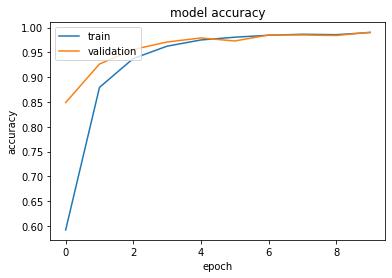

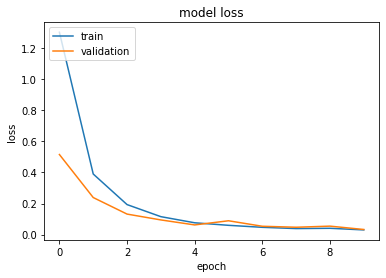

In [ ]:
# summarize history for accuracy
def plot(testhist):
  plt.plot(testhist.history['accuracy'])
  plt.plot(testhist.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(testhist.history['loss'])
  plt.plot(testhist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

plot(testhist)

# Test
# TODO 3

Before feeding the neural network, also the test images must be normalized (with values between 0 and 1) and shuffled (in this case the shuffling is only required for visualization purposes), together with their labels. Shuffle the images storing the results in the variables `test_labels` and `test_images`. Then normalize the images.

In [ ]:
################# code here ###################
# shuffle sets
test_images, test_labels = shuffle(X_test, Y_test, random_state=42)

# Normalization
test_images = test_images/255.0

################# code here ###################

In [ ]:
def print_confusion_matrix_pandas(model, images, labels):
    num_classes = 13
    # Get the predicted classifications for the test-set.
    predictions = model.predict(images)
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=labels, y_pred=np.argmax(predictions,axis=1))
    # Plot the confusion matrix as an image.
    class_names = label_ids.keys()
    df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
    plt.figure(figsize = (15,10))
    sn.heatmap(df_cm, annot=True, cmap='Blues')
    plt.axis([-0.5, 13.5, 13.5, -0.5])
    plt.title('Confusion Matrix Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [ ]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

In [ ]:
plot_images(test_images[:9], test_labels[:9], model.predict(test_images[:9]), class_names)

In [ ]:
print_confusion_matrix_pandas(model, test_images, test_labels)

# TODO 4
# Test with masked faces
**Repeat the whole procedure** using `X_test_glasses`, `X_test_sunglasses`, `X_test_mask`, `X_test_facemask` instead of `X_test`. What happens? Is the network able to recognize people? What you can do to optimize the recognition of people wearing masks and glasses?